In [1]:
import pickle
import pandas as pd
import os
from collections import defaultdict

In [8]:
#How complete checklists looks before & after Filtering Data for month of June 


In [9]:
with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/ebird_data/L10000991_complete_checklists.pkl', 'rb') as f:
    data = pickle.load(f)
data=data[data['MONTH']=='June']
data['SPECIES_COMPLETE_CHECKLISTS'].isnull().any()

False

In [10]:
data.head()


,Month_Num,MONTH,SCIENTIFIC NAME,SAMPLING EVENT IDENTIFIER,SPECIES_COMPLETE_CHECKLISTS,MONTHWISE_COMPLETE_CHECKLISTS
3971,6,June,Acanthis flammea,NaN,0,2
3970,6,June,Acanthis hornemanni,NaN,0,2
3969,6,June,Accipiter cooperii,NaN,0,2
3968,6,June,Accipiter gentilis,NaN,0,2
3967,6,June,Accipiter striatus,NaN,0,2


In [11]:
len(data['SCIENTIFIC NAME'].unique())

684

In [12]:
#Reading training data & Finding  p(L) => Number of complete checklist in a state /total number of complete checklists

In [6]:
d=pd.read_csv('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/train_clustered_vf.csv')
#finding p(L)
by_state=d.groupby(['state_id'])['num_complete_checklists'].sum()
pL=by_state/d['num_complete_checklists'].sum()
d['pL']=d['state_id'].map(pL)
d.head()

,Unnamed: 0,hotspot,r,g,b,nir,meta,rgb,species,env,ped,bioclim,hotspot_id,june_complete_checklists,state_id,num_complete_checklists,pL
0,0,L678935,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,L678935,15,12,432,0.006107
1,1,L1160919,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,L1160919,14,26,76,0.021957
2,2,L893164,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,L893164,8,4,107,0.109308
3,3,L210257,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,L210257,74,5,880,0.038515
4,4,L6223517,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,/network/scratch/t/tengmeli/scratch/ecosystem-...,L6223517,8,3,321,0.039159


In [14]:
#check values of pL 
#pL

In [15]:
#Mapping each state to its corresponding list of locations{'state_id':[hotspot1, hotspot2,...]}

In [8]:

state_to_locations=d.groupby('state_id').agg({'hotspot':list})
state_to_locations=dict(state_to_locations['hotspot'])
#state_to_locations[1]

In [17]:
#Finding Lookup Table speciesToState dictionary of dictionary =>how many checklists of that species in that state=> {species:{state:Num_checklists}}

In [ ]:
#Run Only Once 
#state_to_species mapping
species_to_state=defaultdict(lambda : defaultdict(lambda : 0))
for state,locations in state_to_locations.items():
    #print(locations)
    for location in locations:
        #print(location)
        path=os.path.join('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/ebird_data',location + '_complete_checklists.pkl')
        with open(path, 'rb') as f:
               l_to_s = pickle.load(f)
        
        if  l_to_s.empty :
            print(f'cannot find file at {path}')
            continue
        #filter month of June for each location
        l_to_s=l_to_s[l_to_s['MONTH']=='June']
        #Preprocess N/A values by filling zeros=>some species have 0 occurance 
        l_to_s['SPECIES_COMPLETE_CHECKLISTS']=l_to_s['SPECIES_COMPLETE_CHECKLISTS'].fillna(0)
        assert len(l_to_s)==684 , 'length of filterd june is not as expected'
        assert not (l_to_s['SPECIES_COMPLETE_CHECKLISTS'].isnull().any() ), 'some null valus is present'
        for species in l_to_s['SCIENTIFIC NAME']:
            #print(species)
            #print(l_to_s[l_to_s['SCIENTIFIC NAME']==species]['SPECIES_COMPLETE_CHECKLISTS'])
            #break
            species_to_state[species][state]+=(l_to_s[l_to_s['SCIENTIFIC NAME']==species]['SPECIES_COMPLETE_CHECKLISTS'].to_numpy().item())
            
      

        

In [ ]:
#some checks
species_to_state['Acanthis hornemanni']
l_to_s[l_to_s['SCIENTIFIC NAME']=='Acanthis flammea']['SPECIES_COMPLETE_CHECKLISTS'].to_numpy().item()

In [ ]:
#Sanity checks
lookup_df=pd.DataFrame(species_to_state)
lookup_df.isnull().any()
lookup_df.head()

In [ ]:
#saving the lookup table 

with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/species_to_states.pkl', 'wb') as f:
    pickle.dump(lookup_df, f)

In [ ]:
#Sanity checks=>sum species have 0 total occurance !
#sum(lookup_df['Vireo vicinior'])

In [ ]:
#Reading 

In [ ]:
with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/species_to_states.pkl', 'rb') as f:
    lookup_df= pickle.load(f)
#a bar plot=>takes too long to display
#lookup_df.plot.bar()


In [ ]:
#Calcultate probalities (p(L|y)) => num_checklists_reporting species y in state L /num of checklists reporting species y in all states 

lookup_df=lookup_df.apply(lambda x : x /sum(x))
lookup_df=lookup_df.fillna(0)
lookup_df['pL']=pL
lookup_df.head()

In [ ]:
#Saving 
with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/species_to_states_probs.pkl', 'wb') as f:
    pickle.dump(lookup_df, f)

In [ ]:
#Correction factor => p(L|y)/p(L) 

In [ ]:
correction_factor=lookup_df.copy()
correction_factor.loc[:, correction_factor.columns!='pL']=correction_factor.loc[:, correction_factor.columns!='pL'].apply(lambda x : x/correction_factor['pL'])

In [ ]:
#check how it looks
correction_factor

In [ ]:
#some statistics 
correction_factor.describe()

In [ ]:
correction_factor.max().max()

In [ ]:
correction_factor.min().min()

In [ ]:
correction_factor.mean().mean()

In [ ]:
#saving correction factor


with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/correction_factor.pkl', 'wb') as f:
    pickle.dump(correction_factor, f)

# plotting range maps 

In [ ]:
import numpy as np
import pickle
import pandas as pd
import os
from collections import defaultdict

In [3]:
with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/correction_factor.pkl', 'rb') as f:
    factor=pickle.load( f)

In [13]:


#species=factor.columns
#ToDo make sure it is non song birds
nonsong=np.load('/network/projects/_groups/ecosystem-embeddings/species_splits/not_songbirds_idx.npy')

In [15]:
species[nonsong]

Index(['Accipiter cooperii', 'Accipiter gentilis', 'Accipiter striatus',
       'Actitis macularius', 'Aechmophorus clarkii',
       'Aechmophorus occidentalis', 'Aegolius acadicus', 'Aegolius funereus',
       'Aeronautes saxatalis', 'Aethia cristatella',
       ...
       'Tringa solitaria', 'Trogon elegans', 'Tympanuchus cupido',
       'Tympanuchus phasianellus', 'Tyto alba', 'Uria aalge', 'Uria lomvia',
       'Xema sabini', 'Zenaida asiatica', 'Zenaida macroura'],
      dtype='object', length=379)

In [51]:
subset = factor[['Tringa solitaria','Accipiter cooperii','Zenaida asiatica']]
subset.loc[1,:]

Tringa solitaria      0.000000
Accipiter cooperii    0.680117
Zenaida asiatica      0.630401
Name: 1, dtype: float64

In [ ]:
#state_to_locations 
#d

In [24]:
 #Reading Training data from the existing splits csvs (images & target)
    train=pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/train_clustered_vf.csv")
    val=pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/valid_clustered_vf.csv")
    test=pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/test_june_vf.csv")


In [41]:
locs=pd.read_csv('/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/hotspots_june_filtered.csv')
locs= locs.loc[:, ~locs.columns.str.contains('^Unnamed')]
# locs=locs[locs['hotspot_id'].isin(data['hotspot'].values)].reset_index(drop=True) #filter only by present hotspots
#filter locs in train:
locs=locs[locs['hotspot_id'].isin(train['hotspot'].values)].reset_index(drop=True)
locs

,hotspot_id,lon,lat,county,county_code,state,state_code,june_complete_checklists,num_checklists,num_complete_checklists,num_different_species,state_id
0,L8838283,-84.385593,33.994190,Fulton,US-GA-121,Georgia,US-GA,6,69,61,85,10
1,L2626716,-122.840409,45.735062,Columbia,US-OR-009,Oregon,US-OR,5,116,106,126,36
2,L575194,-72.524126,42.590658,Franklin,US-MA-011,Massachusetts,US-MA,40,322,285,131,18
3,L2141998,-70.732427,42.160000,Plymouth,US-MA-023,Massachusetts,US-MA,18,350,341,103,18
4,L505437,-75.881517,42.178178,Broome,US-NY-007,New York,US-NY,83,2825,2605,178,33
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,L983791,-123.110115,44.064871,Lane,US-OR-039,Oregon,US-OR,25,336,286,120,36
5920,L2146581,-123.084710,39.002042,Mendocino,US-CA-045,California,US-CA,141,3013,2327,218,4
5921,L283109,-90.417566,38.893171,St. Charles,US-MO-183,Missouri,US-MO,41,421,366,233,23
5922,L513743,-75.411090,39.812253,Delaware,US-PA-045,Pennsylvania,US-PA,10,342,318,138,37


In [52]:
locs=locs.loc[:,['lat','lon','state_id']]
#state_to_latslongs=dict(tuple(locs.groupby(['state_id'])[['lat','lon']]))


In [53]:
#Mapping states to lat longs
state_to_latslongs=locs.groupby(['state_id']).agg({'lat':list,'lon':list})

In [ ]:
#state_to_latslongs

In [58]:
# ind=list(state_to_latslongs.keys())
# state_to_latslongs=pd.DataFrame(state_to_latslongs,index=ind)
#locs['state_id']

0       10
1       36
2       18
3       18
4       33
        ..
5919    36
5920     4
5921    23
5922    37
5923     4
Name: state_id, Length: 5924, dtype: int64

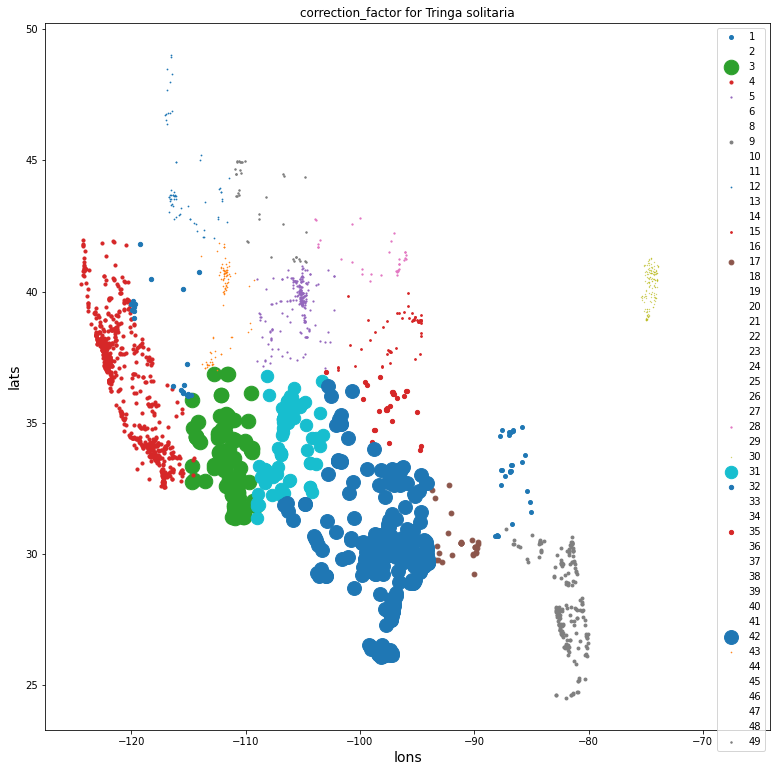

In [82]:
#plotting
import matplotlib.pyplot as  plt
fig = plt.figure(figsize=[13, 13])
    #colors=['lightseagreen','blue','orange']
   # ax = setup_ax(fig)

for state_id in state_to_latslongs.index:
        plt.scatter(state_to_latslongs.loc[state_id, 'lon'], state_to_latslongs.loc[state_id, 'lat'], label=state_id, s=subset.loc[state_id,'Zenaida asiatica']*25)
       
        plt.legend()

    #lgd = ax.legend()
    #for handle in lgd.legendHandles:
     #   handle.set_sizes([50.0])
plt.xlabel('lons',fontsize=14)
plt.ylabel('lats',fontsize=14)
plt.title('correction_factor for Tringa solitaria')
plt.show()

In [71]:
#trying with lookup dataframe 
with open('/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/species_to_states.pkl', 'rb') as f:
    lookup_df= pickle.load(f)

In [73]:
lookup_df_subset=lookup_df[['Tringa solitaria','Accipiter cooperii','Zenaida asiatica']]

In [79]:
#lookup_df_subset

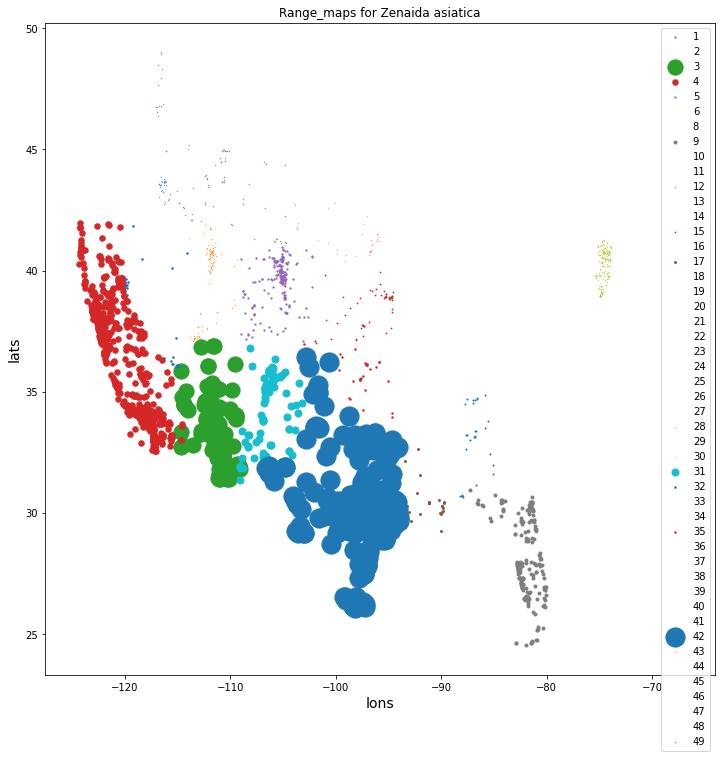

In [80]:
#plotting
import matplotlib.pyplot as  plt
fig = plt.figure(figsize=[12, 12])
    #colors=['lightseagreen','blue','orange']
   # ax = setup_ax(fig)

for state_id in state_to_latslongs.index:
        plt.scatter(state_to_latslongs.loc[state_id, 'lon'], state_to_latslongs.loc[state_id, 'lat'], label=state_id, s=lookup_df_subset.loc[state_id,'Zenaida asiatica']*0.1)
       
        plt.legend()

    #lgd = ax.legend()
    #for handle in lgd.legendHandles:
     #   handle.set_sizes([50.0])
plt.xlabel('lons',fontsize=14)
plt.ylabel('lats',fontsize=14)
plt.title('Range_maps for Zenaida asiatica')
plt.show()